The dataset used is available on Kaggle [at this link](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?resource=download).
This dataset comes from a Berkeley Earth study that combines 1.6 billion temperature reports from 16 pre-existing files.

For this project, a subset related to global land average temperature by country will be used.

# Imports

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


# EDA and Preprocessing

In [2]:

df = pd.read_csv("/Users/leticiapires/Desktop/dev/ClimateChange/GlobalLandTemperaturesByCountry.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


Each column means:
- **dt**: year, day and month
- **AverageTemperature**: global land average temperature in degrees Celsius
- **AverageTemperatureUncertainty**: uncertainty of the collected temperature values
- **Country**: country

In [4]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Temperaturas começaram a ser coletadas em 1743.

In [5]:
# Verificar a maior data presente no dataset
df['dt'].max()

'2013-09-01'

Isso significa que temos em torno de 270 anos de valores de temperatura coletados no decorrer do tempo.

Como temos uma grande quantidade de dados pra cada pais, vams=os nos concentrar no Brazil como estudo.

In [6]:
df_brazil = df.query("Country == 'Brazil'")
df_brazil.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
77110,1832-01-01,24.935,1.372,Brazil
77111,1832-02-01,24.505,1.953,Brazil
77112,1832-03-01,24.617,1.359,Brazil
77113,1832-04-01,23.990,2.013,Brazil
77114,1832-05-01,23.124,1.592,Brazil


Series temporais podem ter problemas com dados nulos, entao antes precisamos lidar com eles.

In [7]:
df_brazil.isnull().sum()

dt                                0
AverageTemperature               17
AverageTemperatureUncertainty    17
Country                           0
dtype: int64

In [8]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2181 entries, 77110 to 79290
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2181 non-null   object 
 1   AverageTemperature             2164 non-null   float64
 2   AverageTemperatureUncertainty  2164 non-null   float64
 3   Country                        2181 non-null   object 
dtypes: float64(2), object(2)
memory usage: 85.2+ KB


Existem muitas formas de lidar com valores nulos, mas para nossa analise decidiu-se efetuar a remocao desses dados, ja que e relativamente pouco.

In [9]:
df_brazil.dropna(inplace=True)

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_26578/822398534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil.dropna(inplace=True)


In [10]:
df_brazil['AverageTemperature'].describe()

count    2164.000000
mean       24.699256
std         0.978787
min        21.797000
25%        24.022500
50%        24.829500
75%        25.449750
max        27.151000
Name: AverageTemperature, dtype: float64

**What can we learn from this describe() output?**

- **count (2164)**: Number of monthly temperature records for Brazil (after dropping nulls). About 180 years of data.
- **mean (~24.7°C)**: The average land temperature in Brazil over the period is around 24.7°C.
- **std (~0.98)**: Relatively low standard deviation — temperatures don’t vary wildly; they stay in a narrow band around the mean.
- **min (21.8°C) / max (27.2°C)**: The range is about 5.4°C. Coldest months are around 22°C and warmest around 27°C (typical for a tropical/subtropical country).
- **quartiles (25%, 50%, 75%)**: Half of the values lie between ~24°C and ~25.5°C; the distribution is fairly symmetric (median 24.8°C is close to the mean).

In short: Brazil’s land temperatures are consistently warm, with moderate seasonal and interannual variation — a good baseline for later comparing trends or extremes.

# Visualizations

<Axes: xlabel='dt', ylabel='AverageTemperature'>

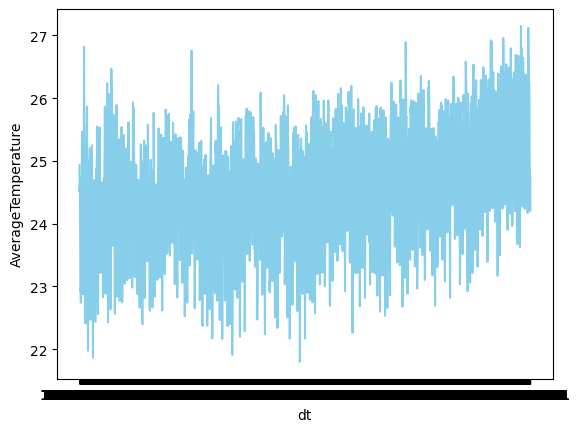

In [11]:
sns.lineplot(x='dt', y='AverageTemperature', data=df_brazil, color='skyblue')

In [12]:
# Average temperature by month (1–12) for Brazil
df_brazil['Month'] = df_brazil['dt'].dt.month
temperature = df_brazil.groupby('Month')['AverageTemperature'].mean().to_frame()

plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 14
plt.bar(temperature.index, temperature['AverageTemperature'].values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

**What can we interpret from this graph?**

This is a **time series** of Brazil's monthly average land temperature from the first records (~1832) until 2013.

- **Oscillating pattern (sawtooth)**: The repeated ups and downs show the **seasonal cycle** — warmer months (e.g. summer) and cooler months (e.g. winter) each year. In Brazil the amplitude is relatively small (about 22°C to 27°C), as expected for a tropical/subtropical country.

- **Long-term trend**: If you look at the overall level of the curve over decades, you can assess whether temperatures are **increasing, stable, or decreasing** over time. Often we see a slight upward drift in recent decades, which can be related to climate change.

- **Variability**: Some periods may look more “noisy” (e.g. more spikes or dips) due to natural variability, measurement uncertainty, or events like El Niño/La Niña.

- **Next steps**: To see the long-term trend more clearly, you can add a **rolling mean** (e.g. 12-month or 120-month) or **annual averages** and plot them on the same figure, so seasonality is smoothed and the trend stands out.

Como podemos ver, no eixo x (data), tivemos um problema. as datas ficaram encavaladas, isso ocorreu porque o seaborn nao entendeu que estamos trabalhando com datas e interpretou a informacao de maneira incorreta. 

In [21]:
df_brazil['dt'] = pd.to_datetime(df_brazil['dt'], format='%Y-%m-%d')

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_26578/664107510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['dt'] = pd.to_datetime(df_brazil['dt'], format='%Y-%m-%d')


In [22]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 77110 to 79289
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2164 non-null   datetime64[ns]
 1   AverageTemperature             2164 non-null   float64       
 2   AverageTemperatureUncertainty  2164 non-null   float64       
 3   Country                        2164 non-null   object        
 4   Month                          2164 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 93.0+ KB


Text(0, 0.5, 'Average Temperature')

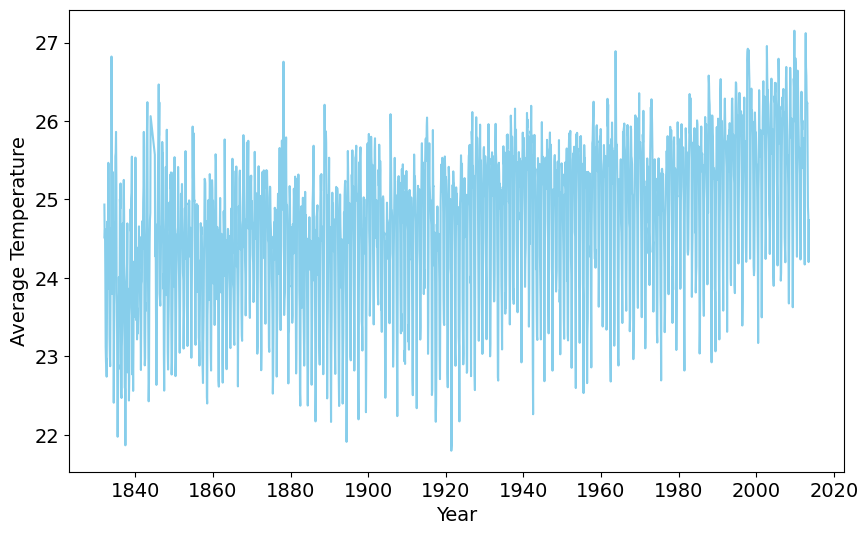

In [23]:
# pra melhorar visualizacao, podemos usar o matplotlib

plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = '14' #ajuste tamanho da fonte
sns.lineplot(x='dt', y='AverageTemperature', data=df_brazil, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Temperature')

### How to read this graph

- **Range:** Temperatures stay within about 21.5°C to 27.5°C (y-axis), typical for Brazil's climate.
- **Variability:** The line fluctuates a lot from month to month due to seasonal and year-to-year variation.
- **Long-term trend:** The overall level of the series increases from the 1830s to the 2010s, consistent with a warming trend.


In [24]:
df_brazil['Month'] = pd.DatetimeIndex(df_brazil['dt']).month

/var/folders/p1/2v8td5_104xbsynzgwgfv23c0000gn/T/ipykernel_26578/1835621185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_brazil['Month'] = pd.DatetimeIndex(df_brazil['dt']).month


In [26]:
df_brazil.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Month
77110,1832-01-01,24.935,1.372,Brazil,1
77111,1832-02-01,24.505,1.953,Brazil,2
77112,1832-03-01,24.617,1.359,Brazil,3
77113,1832-04-01,23.990,2.013,Brazil,4
77114,1832-05-01,23.124,1.592,Brazil,5


In [29]:
df_brazil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2164 entries, 77110 to 79289
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             2164 non-null   datetime64[ns]
 1   AverageTemperature             2164 non-null   float64       
 2   AverageTemperatureUncertainty  2164 non-null   float64       
 3   Country                        2164 non-null   object        
 4   Month                          2164 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(1)
memory usage: 93.0+ KB


In [30]:
# remover coluna país que não é necessária agora
df_brazil = df_brazil.drop(columns=['Country'])

In [31]:
temperature = df_brazil.groupby(['Month']).mean()

In [32]:
temperature

,dt,AverageTemperature,AverageTemperatureUncertainty
Month,,,
1,1922-12-08 06:53:42.099447552,25.263696,0.622724
2,1923-01-08 06:53:42.099447552,25.258972,0.587928
3,1923-02-05 12:43:45.414364672,25.143144,0.560083
4,1923-03-08 12:43:45.414364672,24.615188,0.568337
5,1923-04-07 12:43:45.414364672,23.971238,0.539182
6,1923-05-08 12:43:45.414364672,23.325945,0.586044
7,1923-11-02 12:32:00.000000000,23.332978,0.586433
8,1923-07-08 12:43:45.414364672,24.263823,0.554094
9,1923-02-06 18:32:00.000000000,25.114278,0.548300


Text(0, 0.5, 'Average Temperature')

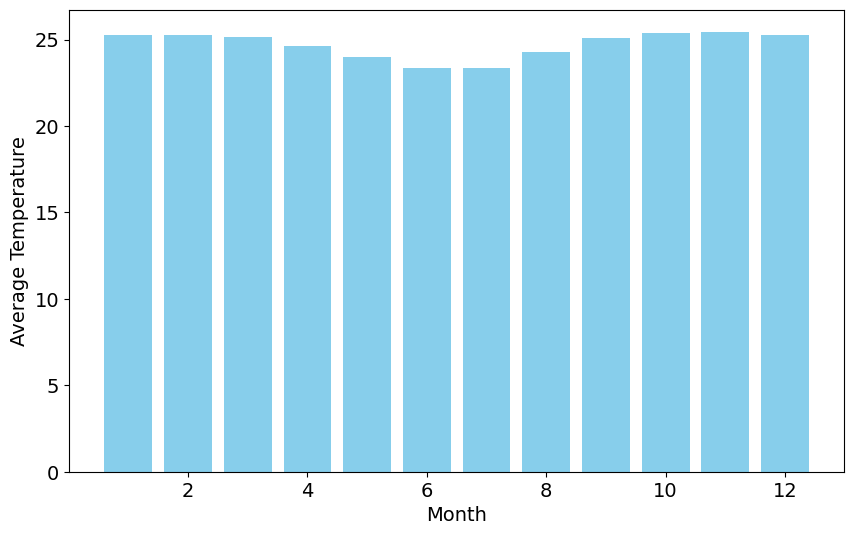

In [33]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = '14'
plt.bar(temperature.index, temperature['AverageTemperature'].values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Temperature')

### Monthly pattern and moving average

**Monthly bar chart**: Variation is relatively small — expected for Brazil — but temperatures are **lower in the middle of the year** (around June–August). For stronger seasonal contrast, try a country at higher latitude (e.g. Canada or Russia).

Besides monthly averages, a common way to visualize the series is the **moving average**.

**Moving average**: At each date you take the mean of the **last N values** (e.g. last 12 months), then move the window forward and repeat.

- *Example (12-month)*: Jan 2010 → mean from Feb 2009 to Jan 2010; Feb 2010 → mean from Mar 2009 to Feb 2010; and so on.
- On the **temperature plot**: the raw series goes up and down every month (seasonality); a 12- or 30-month moving average **smooths** those swings and makes the **long-term trend** easier to see.

In [38]:
# 30, calcular a media movel de 30 meses
df_brazil['rolling_average'] = df_brazil['AverageTemperature'].rolling(30).mean()

In [39]:
df_brazil

,dt,AverageTemperature,AverageTemperatureUncertainty,Month,rolling_average
77110,1832-01-01,24.935,1.372,1,NaN
77111,1832-02-01,24.505,1.953,2,NaN
77112,1832-03-01,24.617,1.359,3,NaN
77113,1832-04-01,23.990,2.013,4,NaN
77114,1832-05-01,23.124,1.592,5,NaN
...,...,...,...,...,...
79285,2013-04-01,25.464,0.253,4,25.672100
79286,2013-05-01,24.906,0.236,5,25.628300
79287,2013-06-01,24.788,0.251,6,25.586633
79288,2013-07-01,24.202,0.201,7,25.538800


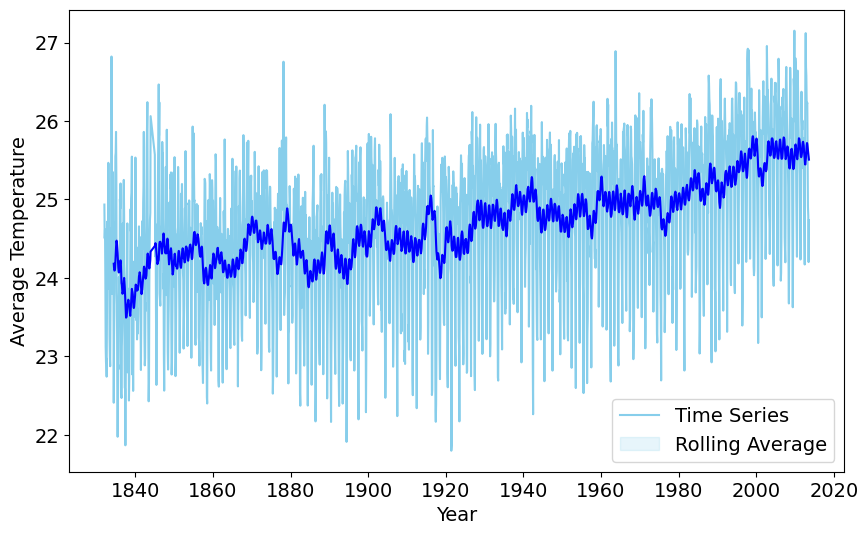

In [ ]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = '14'

sns.lineplot(x='dt', y='AverageTemperature', data=df_brazil, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Temperature')

# gerar gráfico da media movel de 30 meses
sns.lineplot(x='dt', y='rolling_average', data=df_brazil, color='blue')
plt.legend(['Time Series', 'Rolling Average'])


Comparing the beginning of the series in the 1800s with the end of the 2000s–2010s, we observe a clear rise in the mean level of the temperature series. While short-term variability remains present throughout the entire period, the baseline around which temperatures fluctuate gradually shifts upward over time. This pattern indicates a persistent warming trend, rather than isolated or temporary spikes.

Overall, the chart shows that temperature variability has always existed, and short-term ups and downs continue to occur due to seasonal and monthly effects. However, what changes over time is the average level of the series. In time-series terms, the data exhibit high short-term variability but a clear positive long-term trend, highlighting a sustained increase in average temperatures.